In [2]:
import csv

with open('data/orig_0808.csv') as data_file:
    data_reader = csv.DictReader(data_file, delimiter=',', quotechar='"')
    headings = list(next(data_reader).keys())
    print(data_reader._fieldnames)



        

['time', 'C5H9NO7_', 'C5H9NO5_', 'C5H7NO5_', 'C4H9O9_', 'C3H6NO5_', 'C3H6O6_', 'C3H5NO6', 'C10H18N4O16', 'C10H17N3O16', 'C10H17N3O15', 'C10H17N3O14', 'C10H17N3O13', 'C10H17N3O12', 'C10H16O13', 'C10H16N3O18', 'C10H16N2O13', 'C10H16N2O12', 'C10H16N2O11', 'C10H16N2O10', 'C10H16N2O9', 'C10H16N2O8', 'C9H16N2O11', 'C9H14N2O9', 'C9H14NO14', 'C7H14O10', 'C7H14O2', 'C6H11NO9', 'C6H11NO6', 'C6H10O3', 'C5H11NO3', 'C5H10O4', 'C5H10O3', 'C5H10N2O9', 'C5H10N2O8', 'C5H9N3O12', 'C5H9N3O11', 'C5H9N3O10', 'C5H9N2O10', 'C5H9NO7', 'C5H9NO6', 'C5H9NO5', 'C5H9NO4', 'C5H8O11', 'C5H8O5', 'C5H8O4', 'C5H8O3', 'C5H8O2', 'C5H8N2O10', 'C5H8N2O9', 'C5H8N2O8', 'C5H8N2O7', 'C5H8NO6', 'C5H7NO11', 'C5H7NO8', 'C5H7NO7', 'C5H7NO6', 'C5H7NO5', 'C5H7NO4', 'C5H6O4', 'C5H6N2O8', 'C5H5NO5', 'C4H9NO5', 'C4H9NO4', 'C4H8O4', 'C4H8N2O8', 'C4H7O10', 'C4H7N2O8', 'C4H7NO9', 'C4H7NO8', 'C4H7NO6', 'C4H7NO5', 'C4H6O4', 'C4H6O3', 'C4H6N2O7', 'C4H4O3', 'C4H2O4', 'C3H8NO5', 'C3H7N2O8', 'C3H7NO9', 'C3H7NO5', 'C3H6O3', 'C3H6NO5', 'C3H5NO5',

In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from pyclustering.cluster.fcm import fcm
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from numpy.fft import fft, ifft


np.warnings = warnings


def bubbleSetNormal(mx,my, mz, mp, mq, number,s):

    x = np.random.normal(0, s, number) + mx
    y = np.random.normal(0, s, number) + my
    z = np.random.normal(0, s, number) + mz
    p = np.random.normal(0, s, number) + mp
    q = np.random.normal(0, s, number) + mq

    return (x, y, z, p, q)

def fourBalls(n1,n2,n3,n4):
    np.random.seed(42)
    dataset = np.zeros( (n1+n2+n3+n4,5) )
    (dataset[0:n1,0],dataset[0:n1,1], dataset[0:n1,2], dataset[0:n1,3], dataset[0:n1,4]) = bubbleSetNormal( 2.5, 1.0, 4.1, 2, 0,n1,0.5)
    (dataset[n1:n1+n2,0],dataset[n1:n1+n2,1], dataset[n1:n1+n2,2],dataset[n1:n1+n2,2], dataset[n1:n1+n2,4]) = bubbleSetNormal( 2.0,-3.0, 1, -1, 4,n2,0.3)
    (dataset[n1+n2:n1+n2+n3,0],dataset[n1+n2:n1+n2+n3,1], dataset[n1+n2:n1+n2+n3,2], dataset[n1+n2:n1+n2+n3,3], dataset[n1+n2:n1+n2+n3,4]) = bubbleSetNormal(-2.0, 5.0, 2, -1, -3, n3,0.6)
    (dataset[n1+n2+n3:n1+n2+n3+n4,0],dataset[n1+n2+n3:n1+n2+n3+n4,1], dataset[n1+n2+n3:n1+n2+n3+n4,2], dataset[n1+n2+n3:n1+n2+n3+n4,3], dataset[n1+n2+n3:n1+n2+n3+n4,4]) = bubbleSetNormal(-4.0,-1.0, -1, 2, -3, n4,0.9)
    return (dataset)

XBalls = fourBalls(200, 450, 80, 341)


csv_data = pd.read_csv('data/orig_0808.csv', delimiter=',')
# print(csv_data.columns.values[:])
# print('################################')
# print(csv_data[csv_data.columns.values.tolist()[0]])
# print('################################')

data_columns = csv_data.T.values[:]

print(data_columns[0])
sample = data_columns[1:]
X_arr = np.arange(len(data_columns[0]))

norm = lambda x: x / np.max(x)

normalized_sample = np.array([norm(x) for x in sample])

k = 4


#initial_centers = kmeans_plusplus_initializer(normalized_sample, k, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
initial_centers = kmeans_plusplus_initializer(XBalls, k, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()

#fcm_instance = fcm(normalized_sample, initial_centers)
fcm_instance = fcm(XBalls, initial_centers)
fcm_instance.process()

centers = fcm_instance.get_centers()

clusters = fcm_instance.get_clusters()
print(clusters)

def cluster_id(elem, arr):
    n = len(arr)
    for i in range(n):
        if elem in arr[i]:
            return i

ids = [cluster_id(i, clusters) for i in range(len(XBalls))]
print(ids)    


# visualizer = cluster_visualizer_multidim()
# visualizer.append_clusters(clusters, sample)
# visualizer.append_cluster(centers, marker='*', markersize=10)
# visualizer.show()

# fig, axs = plt.subplots(2, 2)
# axs[0, 0].plot(X_arr, centers[0])
# axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(X_arr, centers[1], 'tab:orange')
# axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(X_arr, centers[2], 'tab:green')
# axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(X_arr, centers[3], 'tab:red')
# axs[1, 1].set_title('Axis [1, 1]')


class test:
    def __init__(self):
        self.__norm = lambda x: x / np.max(x)
    
    def get_data(self, data):
        return np.array([self.__norm(x) for x in data])


testdata = test().get_data(sample)

fcm_instance._fcm__m = 1.1
fcm_instance.process()

['8/8/2018 7:36' '8/8/2018 7:37' '8/8/2018 7:38' '8/8/2018 7:39'
 '8/8/2018 7:40' '8/8/2018 7:41' '8/8/2018 7:42' '8/8/2018 7:43'
 '8/8/2018 7:44' '8/8/2018 7:45' '8/8/2018 7:46' '8/8/2018 7:47'
 '8/8/2018 7:48' '8/8/2018 7:49' '8/8/2018 7:50' '8/8/2018 7:51'
 '8/8/2018 7:52' '8/8/2018 7:53' '8/8/2018 7:54' '8/8/2018 7:55'
 '8/8/2018 7:56' '8/8/2018 7:57' '8/8/2018 7:58' '8/8/2018 7:59'
 '8/8/2018 8:00' '8/8/2018 8:01' '8/8/2018 8:02' '8/8/2018 8:03'
 '8/8/2018 8:04' '8/8/2018 8:05' '8/8/2018 8:06' '8/8/2018 8:07'
 '8/8/2018 8:08' '8/8/2018 8:09' '8/8/2018 8:10' '8/8/2018 8:11'
 '8/8/2018 8:12' '8/8/2018 8:13' '8/8/2018 8:14' '8/8/2018 8:15'
 '8/8/2018 8:16' '8/8/2018 8:17' '8/8/2018 8:18' '8/8/2018 8:19'
 '8/8/2018 8:20' '8/8/2018 8:21' '8/8/2018 8:22' '8/8/2018 8:23'
 '8/8/2018 8:24' '8/8/2018 8:25' '8/8/2018 8:26' '8/8/2018 8:27'
 '8/8/2018 8:28' '8/8/2018 8:29' '8/8/2018 8:30' '8/8/2018 8:31'
 '8/8/2018 8:32' '8/8/2018 8:33' '8/8/2018 8:34' '8/8/2018 8:35'
 '8/8/2018 8:36' '8/8/201

In [4]:
from pprint import pprint

csv_data[csv_data.keys()[0:5]][:-1].style.to_latex(buf='./data.tex')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
9       8/8/2018 7:45
69      8/8/2018 8:45
129     8/8/2018 9:45
189    8/8/2018 10:45
249    8/8/2018 11:45
309    8/8/2018 12:45
Name: time, dtype: object
9      0.000045
69     0.000107
129    0.000169
189    0.000115
249    0.000173
309    0.000147
Name: C5H10O4, dtype: float64


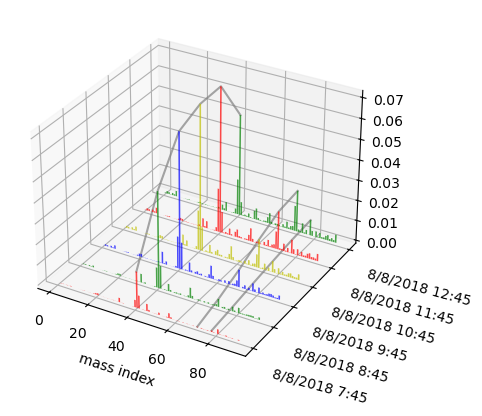

In [5]:

print(plt.style.available)
plt.style.use('seaborn-v0_8-bright')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

indizes = [9, 69, 129, 189, 249, 309]
colors = ['r', 'g', 'b', 'y', 'r', 'g', 'b', 'y']
time = csv_data[csv_data.keys()[0]]
yticks = [time[indizes]]
pprint(yticks[0])
xs = np.arange(len(csv_data.keys()))
ys = csv_data.T[indizes]

#print(xs[1:])
#print(list(ys[1][1:]))
print(csv_data[csv_data.keys()[31]][indizes])

for i in range(len(indizes)):
    #ys = csv_data[csv_data["time"][]
    cs = [colors[i]] * (len(xs) - 1)
    ax.bar(xs[1:], list(ys[indizes[i]][1:]), zs=i, zdir='y', color=cs, alpha=.7)


ax.set_xlabel('mass index')
#ax.set_yticks(range(0, len(indizes)), [x for i, x in enumerate(yticks[0])], rotation=0)
ax.set_yticks(range(0, len(indizes)))
ax.set_yticklabels(yticks[0], rotation=-15, ha='left')

ax.plot(xs=np.arange(len(indizes)), ys=csv_data[csv_data.keys()[41]][indizes], zs=[41], zdir='x', c='gray', alpha=.7)
ax.plot(xs=np.arange(len(indizes)), ys=csv_data[csv_data.keys()[71]][indizes], zs=[71], zdir='x', c='gray', alpha=.7)
ax.plot(xs=np.arange(len(indizes)), ys=csv_data[csv_data.keys()[78]][indizes], zs=[78], zdir='x', c='gray', alpha=.7)
#plt.savefig("../kolloquium/spectra-lines.png", dpi = 500)

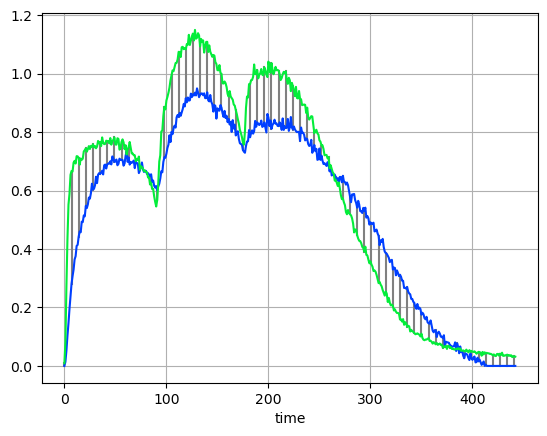

In [6]:
plt.grid(True)

plt.xlabel('time')

x = list(range(442))
y1 = .95 * normalized_sample[31]
y2 = 1.15 * normalized_sample[20]

for i_x in range(0, len(y1), 7):
    
    plt.plot([i_x, i_x], [y1[i_x], y2[i_x]], color="gray")

plt.plot(y1)
#plt.plot(normalized_sample[18])
plt.plot(y2)
#plt.fill_between(np.arange(len(y1)), list(y1), list(y2), color="gray")



{0: 'time',
 1: 'C5H9NO7_',
 2: 'C5H9NO5_',
 3: 'C5H7NO5_',
 4: 'C4H9O9_',
 5: 'C3H6NO5_',
 6: 'C3H6O6_',
 7: 'C3H5NO6',
 8: 'C10H18N4O16',
 9: 'C10H17N3O16',
 10: 'C10H17N3O15',
 11: 'C10H17N3O14',
 12: 'C10H17N3O13',
 13: 'C10H17N3O12',
 14: 'C10H16O13',
 15: 'C10H16N3O18',
 16: 'C10H16N2O13',
 17: 'C10H16N2O12',
 18: 'C10H16N2O11',
 19: 'C10H16N2O10',
 20: 'C10H16N2O9',
 21: 'C10H16N2O8',
 22: 'C9H16N2O11',
 23: 'C9H14N2O9',
 24: 'C9H14NO14',
 25: 'C7H14O10',
 26: 'C7H14O2',
 27: 'C6H11NO9',
 28: 'C6H11NO6',
 29: 'C6H10O3',
 30: 'C5H11NO3',
 31: 'C5H10O4',
 32: 'C5H10O3',
 33: 'C5H10N2O9',
 34: 'C5H10N2O8',
 35: 'C5H9N3O12',
 36: 'C5H9N3O11',
 37: 'C5H9N3O10',
 38: 'C5H9N2O10',
 39: 'C5H9NO7',
 40: 'C5H9NO6',
 41: 'C5H9NO5',
 42: 'C5H9NO4',
 43: 'C5H8O11',
 44: 'C5H8O5',
 45: 'C5H8O4',
 46: 'C5H8O3',
 47: 'C5H8O2',
 48: 'C5H8N2O10',
 49: 'C5H8N2O9',
 50: 'C5H8N2O8',
 51: 'C5H8N2O7',
 52: 'C5H8NO6',
 53: 'C5H7NO11',
 54: 'C5H7NO8',
 55: 'C5H7NO7',
 56: 'C5H7NO6',
 57: 'C5H7NO5',
 58:

/tmp/ipykernel_17978/3896293560.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  keys_df.T.to_latex(columns=[0],buf='./keys.tex', column_format='cccc')


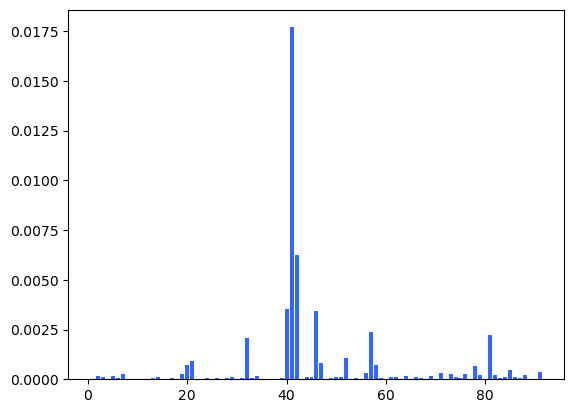

In [7]:
plt.bar(xs[1:], list(ys[indizes[0]][1:]), alpha=.8)

pprint(dict(enumerate(csv_data.keys())))

keys_df = pd.DataFrame(dict(enumerate(csv_data.keys())), index=list(range(len(csv_data.keys()))))

keys_df.T.to_latex(columns=[0],buf='./keys.tex', column_format='cccc')


91
91
(1071, 2)
91 443


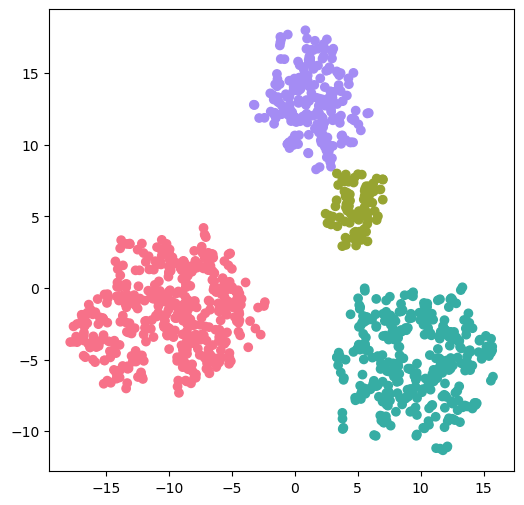

In [8]:
from sklearn.decomposition import KernelPCA
from clustermodels.utils.mspecdata import MSData
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.fcm import fcm
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer as kmpp_init
import warnings
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

np.warnings = warnings

# Try Kernel PCA on MSData

data = MSData('./data/orig_0808.csv')
data_arr = data.get_array_like()
x_max, y_max = data_arr.shape
norm = lambda x: x / np.max(x)
data_normed = np.array([list(norm(x)) for x in data_arr])

# for i in range(x_max - 1):
#     for j in range(i, x_max):
#         plt.scatter(data_normed[:, i], data_normed[:, j])
#         plt.show()


kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1, fit_inverse_transform=True,alpha=20)
X = kpca.fit_transform(XBalls)
X_arr = np.arange(len(X[0]))

print(x_max)

# for i in range(x_max - 1):
#     for j in range(i, x_max - 1):
#         print(f'({i}, {j})')
#         plt.scatter(X[:, i], X[:, j])
#         print(zip(X[:, i], X[:, j]))
#         plt.show()

#fig = plt.figure()

colors = ['blue', 'red', 'green', 'yellow']


# y = list(range(len(X[:])))
# for i in range(7):
#     for j in range(i + 1, 7):
#         for k in range(j + 1, 7):
#             ax = fig.add_subplot(projection='3d')
#             ax.plot(X[:, 0], X[:, 1], X[:,2], '.')

            



# for c in range(2, 12):
#     initial_centers = kmpp_init(X, c, kmpp_init.FARTHEST_CENTER_CANDIDATE).initialize()
#     fcm_instance = fcm(X, initial_centers)
#     fcm_instance.process()
#     centers = fcm_instance.get_centers()
#     centers_reconstr = kpca.inverse_transform(centers)
    
#     for k in range(1, c):
#         plt.plot(X_arr, centers[k])
#         plt.show()
#     print('################################################################')

    



print(len(data_arr))
print(X.shape)
print(x_max, y_max)


from sklearn.manifold import TSNE
m = TSNE(learning_rate='auto', n_components=3)
tsne_features = m.fit_transform(XBalls)
X_ = tsne_features


import seaborn as sns
#sns.set_theme(style="ticks")
cmp= ListedColormap(sns.color_palette("husl", k).as_hex())
fig = plt.figure(figsize=(6,6))
ax = plt.scatter(X_[:, 0],X_[:, 1], c=ids, marker='o', alpha=1, cmap=cmp)





In [9]:
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt
from clustermodels.utils.mspecdata import MSData
from numpy.fft import fft, ifft

data = MSData('./data/orig_0808.csv')
data_arr = data.get_array_like()
x_max, y_max = data_arr.shape
norm = lambda x: x / np.max(x)
data_normed = np.array([list(norm(x)) for x in data_arr])

data_normed_fft = fft(data_normed, axis=0)


fcm = FCM(n_clusters=5)
fcm.fit(data_normed_fft)
centers = fcm.centers
x_arr = np.arange(len(centers[0]))

n_clusters_list = [c for c in range(2, 13)]
pc = []
pec = []
for c in n_clusters_list:
    fcm = FCM(n_clusters=c,m=1.8, distance='cosine')
    fcm.fit(data_normed)
    pc.append(fcm.partition_coefficient)
    pec.append(fcm.partition_entropy_coefficient)

plt.plot(n_clusters_list, pc)
plt.show()
plt.plot(n_clusters_list, pec)
# for cnt in centers:
#     plt.plot(x_arr, cnt)
#     plt.show()

ModuleNotFoundError: No module named 'fcmeans'

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from pyclustering.cluster.fcm import fcm
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from numpy.fft import fft, ifft


np.warnings = warnings


csv_data = pd.read_csv('data/orig_0808.csv', delimiter=',')